# K-Means Clustering: Python Implementation from Scratch

The main objective of the k-means algorithm is to minimize the sum of distances between the data points and their respective cluster's centroid.

In [ ]:
#Importing Libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from matplotlib import style
style.use('ggplot')

In [ ]:

class K_Means:
    def __init__(self, k = 3, tol=0.001, max_iter = 300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def optimizedFit(self,data):
      self.centroids = data[np.random.choice(len(data), self.k, replace=False), :]

      for i in range(self.max_iter):
        distances = np.linalg.norm(data[:, np.newaxis, :] - self.centroids[np.newaxis, :, :], axis=2)
        self.classifications = np.argmin(distances, axis=1)
        self.classifications = [np.where(self.classifications == c)[0] for c in range(self.k)]

        prev_centroids = np.copy(self.centroids)

        for c in range(self.k):
            if len(self.classifications[c]) > 0:
                self.centroids[c] = np.mean(data[self.classifications[c], :], axis=0)

        if np.linalg.norm(self.centroids - prev_centroids) < self.tol:
            break
    
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

# Preprocessing

This data set is kind of massive (or, at the very least, much larger than what I'm used to working with), and I'm not entirely sure how much time I want to/can spend on computation, so I'm going to take a look at this gzip file and see what it has to offer me.

In [ ]:
FILE = open('/content/drive/MyDrive/School/d. Undergrad/Year 2/Spring/CSC 240/Homework5/vocab.pubmed.txt','r')
words = FILE.readlines()

# strip the newline character
for i, word in enumerate(words):
  words[i] = words[i].strip()


That first step of preprocessing seemed to go pretty quickly, which is good news.

Next up in my journey is to develop some quantitative measures for the words.

I'll be sorting each word into a one-dimensional matrix of the frequency of each letter in the english alphabet, regardless of case.

In [ ]:
def wordSort(word):
  if not (word.isalpha() and word.isascii()):
    return 0
  letterList = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
  for letter in word:
    ascii = ord(letter)
    subtract = 97 #the decimal ascii code for 'a'
    if ascii <= 90:
      subtract = 65 #the decimal ascii code for 'A'
    letterList[ascii-subtract] += 1 #shift the codes to 0 to fit in my matrix
  return letterList


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = []
for word in words:
  x = wordSort(word)
  if not x == 0:
    data.append(x)

arr = np.array(data)

In [ ]:
arr

array([[2, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 2]])

In [ ]:
cleanWords = []
for word in words:
  if not wordSort(word) == 0:
    cleanWords.append(word)

#The Elbow Method

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min
from ipywidgets import IntProgress
from IPython.display import display

max_count = 100
f = IntProgress(min = 0, max = 100)
display(f)

elbow = []
for k in range(2,100):
  elbowModel = K_Means(k = k,tol = 0.00001, max_iter = 2000)
  elbowModel.optimizedFit(arr)
  labels, mindist = pairwise_distances_argmin_min(X = arr, Y = elbowModel.centroids)
  elbow.append([k,mindist.sum()])
  f.value += 1

elbowdf = pd.DataFrame(elbow,columns = ['k','cost'])

IntProgress(value=0)

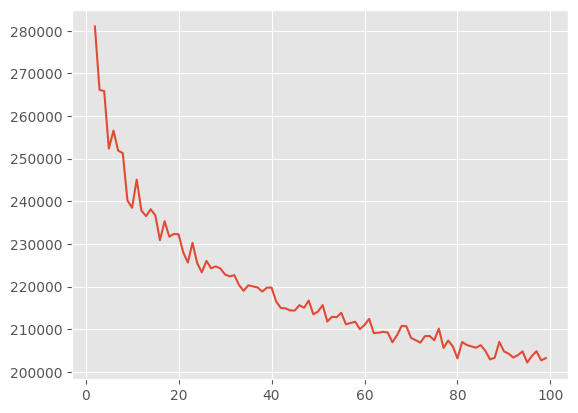

In [ ]:
plt.plot(elbowdf['k'],elbowdf['cost'])
elbowfig = plt.gcf()
elbowfig.savefig('/content/drive/MyDrive/School/d. Undergrad/Year 2/Spring/CSC 240/Homework5/elbow.png')

The cost appears to decrease linearly after k = 15, which is a reasonable number of classifications for a data set of this size and variety.

#Training and Predictions

In [ ]:
model = K_Means(k = 15, tol = 0.00001, max_iter = 2000)
model.optimizedFit(arr)

classifications = []
for i in range(len(cleanWords)):
  classifications.append([cleanWords[i], model.predict(arr[i])])

classificationsDF = pd.DataFrame(classifications)

Cast everything into dataframes and save to my Drive.

In [ ]:
classificationsDF.to_csv('/content/drive/MyDrive/School/d. Undergrad/Year 2/Spring/CSC 240/Homework5/predictions.csv')

In [ ]:
centroids = pd.DataFrame(model.centroids, columns = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'])

In [ ]:
centroids.to_csv('/content/drive/MyDrive/School/d. Undergrad/Year 2/Spring/CSC 240/Homework5/centroids.csv')